In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn import metrics, datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import model_selection

In [2]:
data = pd.read_csv("E:/VIT/Sem 2/NN/rainfall predictor/austin_weather.csv")
print(data.shape)
data

(1183, 17)


,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,32,29,26,17,15,13,58,54,49,30.48,10,10,10,15,8,23,0.00
1,34,29,23,18,15,13,60,55,49,30.31,10,10,10,17,10,28,0.00
2,36,29,22,15,8,2,50,38,26,30.68,10,10,10,17,7,27,0.00
3,36,34,31,30,25,19,92,72,52,30.38,10,8,2,13,7,21,0.01
4,36,34,31,34,31,26,100,93,85,30.31,10,5,2,10,5,17,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,105,91,76,71,64,55,87,54,20,29.90,10,10,10,14,5,20,0.00
1179,105,92,79,69,68,66,55,43,31,29.95,10,10,10,13,3,20,0.00
1180,105,92,79,76,73,69,91,63,35,29.81,10,10,9,15,5,24,0.00
1181,106,93,79,70,68,63,69,48,27,29.91,10,10,10,13,4,20,0.00


In [3]:
X = data.drop(['PrecipitationSumInches'], axis=1) 
Y = data['PrecipitationSumInches']
Y = Y.values.reshape(-1, 1)
Y.shape

(1183, 1)

In [4]:
#Logistic regression

Y_temp = data['PrecipitationSumInches']
Y_temp = Y_temp.values.reshape(-1, 1)

Y1 = []

#No Rains', 'Drizzle', 'Moderate Rains', 'Heavy Rains'

x1 = pd.DataFrame(columns=X.columns.values)
x2 = pd.DataFrame(columns=X.columns.values)
x3 = pd.DataFrame(columns=X.columns.values)
x4 = pd.DataFrame(columns=X.columns.values)

In [5]:
for i in range(Y_temp.size):
    if(Y_temp[i]<0.001):
        Y1.append(1)
        x1.loc[i] = X.loc[i]
    elif(Y_temp[i]>=0.001 and Y_temp[i]<0.1):
        Y1.append(2)
        x2.loc[i] = X.loc[i]
    elif(Y_temp[i]>=0.1 and Y_temp[i]<1.2):
        Y1.append(3)
        x3.loc[i] = X.loc[i]
    else:
        Y1.append(4)
        x4.loc[i] = X.loc[i]

In [6]:
Y = np.array(Y).reshape(len(Y), )

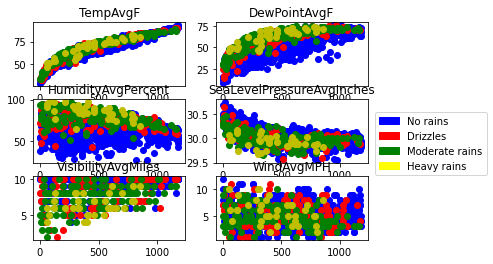

In [7]:
x1 = x1.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH'], axis=1)
x2 = x2.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH'], axis=1)
x3 = x3.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH'], axis=1)
x4 = x4.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH'], axis=1)

for i in range(6):
    plt.subplot(3,2,i+1)
    plt.scatter(x1.index.values, x1[x1.columns.values[i]], color='b')
    plt.scatter(x2.index.values, x2[x2.columns.values[i]], color='r')
    plt.scatter(x3.index.values, x3[x3.columns.values[i]], color='g')
    plt.scatter(x4.index.values, x4[x4.columns.values[i]], color='y')
    plt.title(x1.columns.values[i])

blue_patch = mpatches.Patch(color='blue', label='No rains')
red_patch = mpatches.Patch(color='red', label='Drizzles')
green_patch = mpatches.Patch(color='green', label='Moderate rains')
yellow_patch = mpatches.Patch(color='yellow', label='Heavy rains')
plt.legend(handles=[blue_patch, red_patch, green_patch, yellow_patch], bbox_to_anchor=(1.05, 2), loc=2, borderaxespad=0.)

plt.show()


In [8]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y1, test_size= 0.2)

In [9]:
model = LogisticRegression(multi_class='ovr', solver='liblinear').fit(X_train, Y_train)

In [10]:
#print(metrics.classification_report(Y, model.predict(X)))
print("Accuracy:",100*model.score(X_test,Y_test))

Accuracy: 83.54430379746836


In [11]:
input = np.array([[70], [80], [80], [80], [78], [38], [80], [49], [22], [30.35], [10], [10], [10], [14], [4], [21]])
input = input.reshape(1, -1)
classes = ['No Rain', 'Drizzles', 'Moderate Rains', 'Heavy Rains']
print("Prediction:",classes[int(model.predict(input))])

Prediction: Heavy Rains


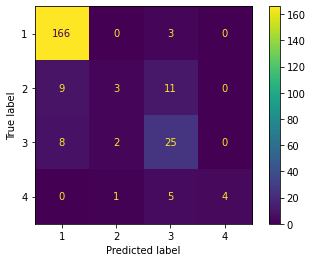

In [12]:
disp=metrics.plot_confusion_matrix(model, X_test, Y_test)

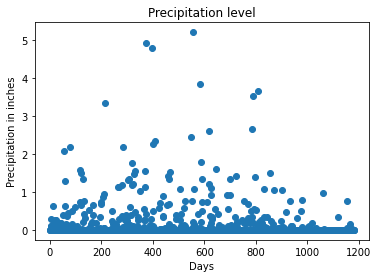

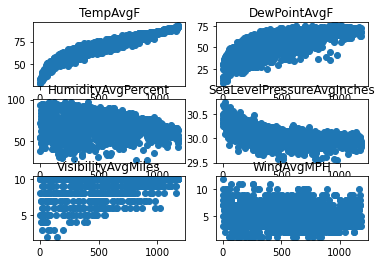

In [13]:
#Linear Regression Model

days = [i for i in range(Y.size)]
plt.scatter(days, Y)

plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")

plt.show()
x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH'], axis=1)

for i in range(x_vis.columns.size):
    plt.subplot(3,2,i+1)
    plt.scatter(days, x_vis[x_vis.columns.values[i]])
    plt.title(x_vis.columns.values[i])
plt.show()

In [14]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size= 0.2)

In [15]:
clf = LinearRegression()
clf.fit(X_train, Y_train)

LinearRegression()

In [16]:
input = np.array([[60], [51], [45], [37], [49], [43], [93], [75], [57], [29.68], [10], [7], [2], [20], [4], [31]])
input = input.reshape(1, -1)
print(clf.predict(input))

[0.5615272]


In [17]:
pred=clf.predict(X_test)
mean_squared_error(Y_test, pred)

0.15894571553936718

In [18]:
pred1=clf.predict(X)